# Metoda najmanjih kvadrata

a= [0.64285714 1.14285714]


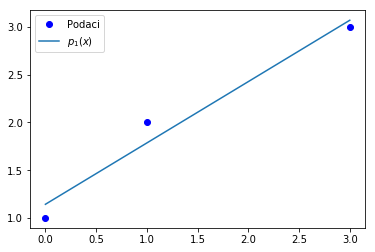

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,3])
y=np.array([1,2,3])
a = np.polyfit(x, y, 1)
print("a=",a)
z=np.linspace(0.0, 3.0, 50)
pp=np.polyval(a,z)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(z, pp,label=r'$p_1(x)$')
plt.legend(loc='upper left')
plt.savefig("lin_regresija.pdf")

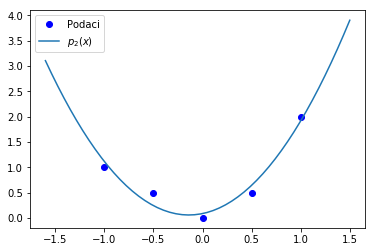

In [4]:
x=np.array([-1.0, -0.5, 0.0 ,0.5,1.0])
y=np.array([1.0,0.5,0.0, 0.5, 2.0])
a = np.polyfit(x, y, 2)
z=np.linspace(-1.6, 1.5, 50)
pp=np.polyval(a,z)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(z, pp,label=r'$p_2(x)$')
plt.legend(loc='upper left')
plt.savefig("kv_regresija.pdf")

# Preodređeni sustavi

Prilikom polinomijalne aproksimacije u matričnoj fomulaciji dobivamo preodređe sustave. U ovom kolegiju bavimo se preodređenim sustavima punog ranga, s više redaka nego stupaca. Za rješavanje takvih sustava može se upotrijebiti neka od funkcija [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) ili [link](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq). Ovdje su sdani primjeri s matricom $A$ dobivenom iz polinomijalne interpolacije, no ove funkcije mogu se koristiti za bilo koji preodređeni sustav, u namjeri da se dobije rjeđenje u smislu metode najmanjih kvadrata.

In [30]:
x=np.array([0,1,3])
y=np.array([1,2,3])
z=np.linspace(0.0, 3.0, 50)
A = np.vstack([np.ones(len(x)),x]).T

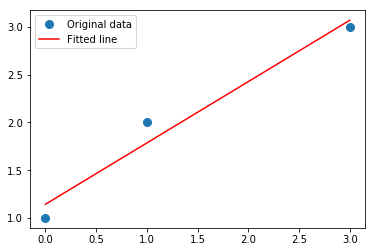

In [31]:
c= np.flipud(np.linalg.lstsq(A, y, rcond=None)[0]) 
# ako radimo kao na predavanjima, onda moramo zamijeniti pordak koeficijenta, pa zato flipud
pp=np.polyval(c,z)
plt.plot(x, y, 'o', label='Original data', markersize=8)
plt.plot(z, pp, 'r', label='Fitted line')
plt.legend()
plt.show()

Sad upotrijebimo funkciju iz scipy biblioteke.

In [32]:
from scipy.linalg import lstsq
p, res, rnk, s = lstsq(A, y)
p

array([1.14285714, 0.64285714])

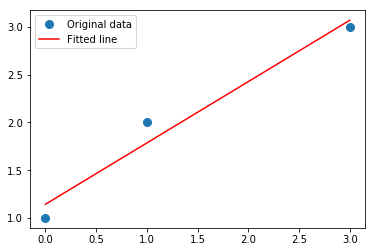

In [33]:
pp2 = p[0] + p[1]*z
plt.plot(x, y, 'o', label='Original data', markersize=8)
plt.plot(z, pp, 'r', label='Fitted line')
plt.legend()
plt.show()

# QR  faktorizacija matrice

In [43]:
A = np.array([[12, -51, 4],[6, 167, -68],[-4, 24, -41]])
q, r = np.linalg.qr(A)
print("q=",q)
print("r=",r)

q= [[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
r= [[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]


# SVD faktorizacija matrice

In [46]:
import numpy as np
A=np.array([[1.0, 2.0, 3.0 ],[3, 5.0, 7.0], [2.0, 7.0, 9.0], [3,2,1]])
U, S, V =np.linalg.svd(A)
print("U=", U)
print("S=", S)
print("V=", V)

U= [[-2.42673503e-01 -1.85001193e-02  3.37989207e-01  9.09137290e-01]
 [-5.90346523e-01  1.87035599e-01  6.73233512e-01 -4.04061018e-01]
 [-7.49103832e-01 -3.57914448e-01 -5.57441205e-01  7.77156117e-16]
 [-1.77324567e-01  9.14643471e-01 -3.48968821e-01  1.01015254e-01]]
S= [15.38681237  2.78681182  0.69259283]
V= [[-0.26281561 -0.58722076 -0.76557151]
 [ 0.92245489  0.07968373 -0.3777929 ]
 [ 0.28285143 -0.80549506  0.52074253]]


SVD se koristi i u kompresiji slike

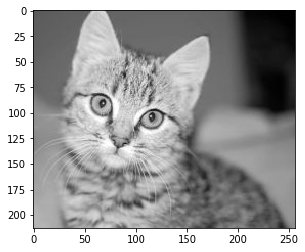

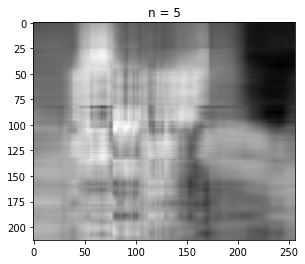

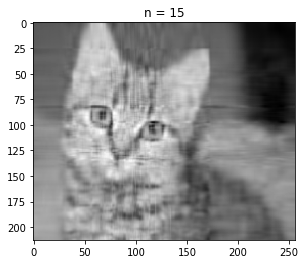

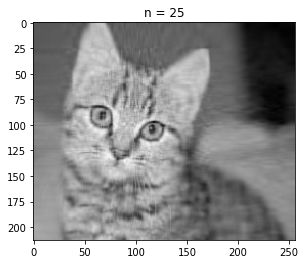

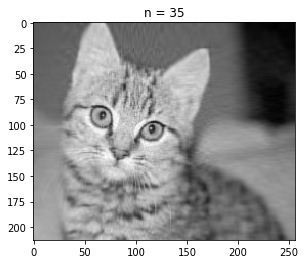

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
slika = Image.open('macka1.jpg')
matrica = np.array(list(slika.getdata(band=0)), float)
matrica.shape = (slika.size[1], slika.size[0])
matrica = np.matrix(matrica)
plt.figure(figsize=(5,4))
plt.imshow(matrica, cmap='gray');
plt.show()
U, sigma, V = np.linalg.svd(matrica)
for i in range(5, 36, 10):
    manji_rang = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(manji_rang, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()